Credit Score Classification

In [58]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# For warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
# Replace 'credit_score_data.csv' with your actual dataset file path
df = pd.read_csv(r"C:\Users\Avinash rai\Downloads\Credit_Score\credit_score.csv")

# Checking the first few rows of the dataset
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Removing unnecessary column from the dataframe

In [59]:

# Drop irrelevant or unnecessary columns
df.drop(['ID', 'SSN','Type_of_Loan','Credit_History_Age','Customer_ID', 'Name'], axis=1, inplace=True)

# Check the first few rows after cleaning
df.head()


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


 Checking the shape of a dataframe and datatypes of all columns 
along with calculating the statistical data.

In [60]:
df. shape
df. info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


### Missing Values 
Checking out the missing values in a dataframe

In [61]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

### Data Cleaning 

Replacing the special 
characters with empty 
string or with null 
values according to 
the data and 
converting it into int 
or float datatype. Also, 
Converting the 
categorical values of 
some columns into 
integer values.

In [62]:
df["Age"]=df["Age"].str.replace("_","")
df["Age"]=df["Age"].astype(int)
df["Occupation"]=df["Occupation"].replace("_______",np.nan)
df["Annual_Income"]=df["Annual_Income"].str.replace("_","")
df["Annual_Income"]=df["Annual_Income"].astype(float)
df["Num_of_Loan"]=df["Num_of_Loan"].str.replace("_","")
df["Num_of_Loan"]=df["Num_of_Loan"].astype(int)
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","")
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype(float)
df["Credit_Score"]=df["Credit_Score"].replace(["Poor","Standard","Good"],[0,1,2])
df["Monthly_Balance"]=df["Monthly_Balance"].str.replace("_","")
df["Monthly_Balance"]=df["Monthly_Balance"].astype(float)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",np.nan)
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("_","")
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype(float)
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("NM","No")
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace(["Yes","No"],[1,0])
df["Outstanding_Debt"]= df["Outstanding_Debt"].str.replace("_","")
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype(float)
df["Credit_Mix"]=df["Credit_Mix"].replace(np.nan,0)
df["Credit_Mix"]=df["Credit_Mix"].replace(["Standard","Good","Bad"],[1,2,0])
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].replace("_",np.nan)
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].astype(float)


Clearly, The datatype 
of the columns have 
been changed after 
performing the 
operation

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

After replacing the 
special characters with 
null value. The new 
missing value is shown 
in the figure. Here 
Forward and backward 
filling method is used 
to fill the missing 
values.

In [64]:
df.isnull().sum()




Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [65]:
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

removing outliers 
from age since all 
other columns 
values are 
relevant

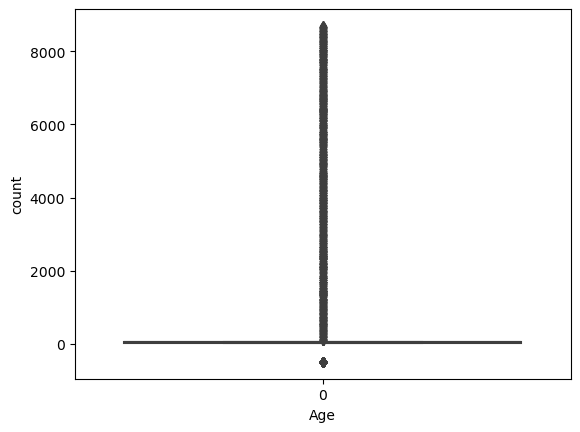

In [66]:
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

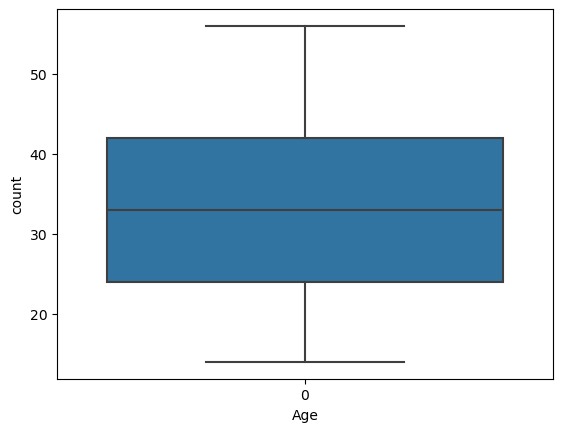

In [67]:
col_names=["Age"]
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
data=df[(df.Age>=Q1 - 1.5*IQR) & (df.Age<=Q3 + 1.5*IQR)]
sns.boxplot(data["Age"])
plt.xlabel("Age")
plt.ylabel("count")
plt.show()


Performing One Hot Encoding for  
categorical features of a dataframe

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Month"] =le.fit_transform(df["Month"])
df["Occupation"]=le.fit_transform(df["Occupation"])
df ["Payment_Behaviour"] =le.fit_transform(df["Payment_Behaviour"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

### Feature Selection 
Selecting the features using VIF. VIF should be less 
than 5. Here, all features have VIF value less than 
5, So we will select all the features. 

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'Credit_Score') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)


                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.277722
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13          Outstanding_Debt  0.396141
14  Credit_Utilization_Ratio  0.024506
15     Payment_of_Min_Amount  0.476749
16       Total_EMI_per_month  0.972258
17   Amount_invested_monthly  0.911321
18         Payment_Behaviour  0.310525
19           Monthly_Balance  1.000207


 ## Logistic Regression
 The accuracy of the logistic regression model is
 61.8 percentage

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame

# Check for columns with non-numeric data
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-Numeric Columns: ", non_numeric_columns)

# Attempt to convert non-numeric columns to numeric, forcing errors to NaN
for col in non_numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# After conversion, check for missing values (NaNs)
print("Missing values after conversion:\n", df.isnull().sum())

# Handle missing values - you can either drop them or fill with a suitable value (e.g., mean, median)
df.fillna(df.mean(), inplace=True)  # Filling missing values with column mean (works for numeric columns)

# Alternatively, if you want to drop rows with any NaN values:
# df.dropna(inplace=True)

# Check the cleaned data
print(df.head())

# Split the data
X = df.drop(columns=["Credit_Score"])  # Features
y = df["Credit_Score"]  # Target variable

# Split into train and test sets (80-20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
lr.fit(x_train, y_train)

# Make predictions
y_pred = lr.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Show actual vs predicted values
result_df = pd.DataFrame({
    "Actual Value": y_test,
    "Predicted Value": y_pred
})
print(result_df.head())


Non-Numeric Columns:  Index(['Credit_Mix'], dtype='object')
Missing values after conversion:
 Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64
   Month  Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      3   23          12       19114.12            1824.843333   
1      2   

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob